In [1]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
from sklearn.decomposition import PCA

In [3]:
from sklearn.datasets import load_digits

In [4]:
digits = load_digits() # The MNIST digits

In [5]:
digits.data[0, :] # Each row is an 8x8 image

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [6]:
digits.images[0] #Come conveniently packaged as a matrix

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

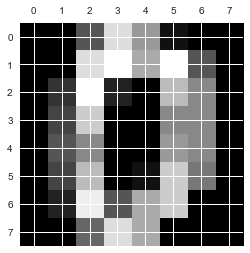

In [7]:
plt.gray() 
plt.matshow(digits.images[0]) # So we can quickly visualize this
plt.show()

In [8]:
pca = PCA() # Initialize PCA

In [9]:
pca.fit(digits.data) # Fit the model with digits.data

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [10]:
print(digits.data.shape)

(1797, 64)


In [11]:
pca.explained_variance_ratio_.shape # These are the eigen values of the 
                                    # eigen vectors of the covariance matrix of the digits data

(64,)

Now we must decide how many dimensions we want to keep. We must pick K components that will represent 99% of the variance in data. 

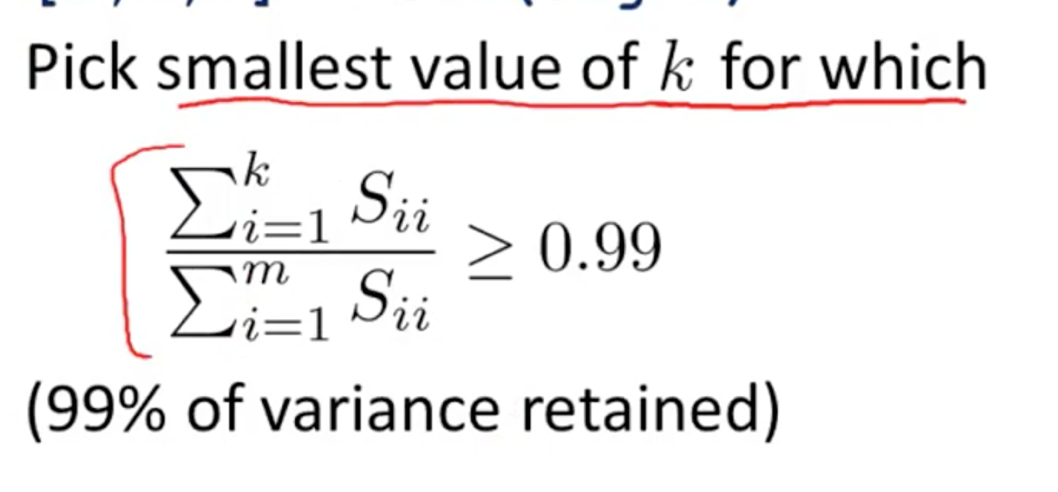

In [12]:
pca.explained_variance_ratio_ # This is a convenient calculation, which is basically 
                                # each eigen value divided by the total sum of eigen values
                                # The eigen values come sorted in decreasing order of magnitude
                                # Remember, larger the eigen value, more variance it captures

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [13]:
cumulative_sum = pca.explained_variance_ratio_.cumsum() # We can easily do a cumulative sum on the explained_variance_ratio

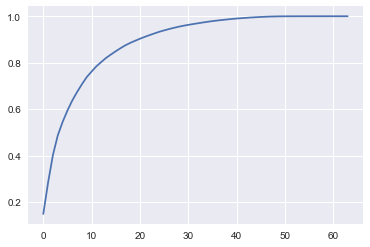

In [14]:
plt.plot(cumulative_sum) 
plt.show()

In [15]:
cumulative_sum

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

In [16]:
print("indices of cumulative sum of ratios greater than .99", np.nonzero(cumulative_sum >= 0.99))

('indices of cumulative sum of ratios greater than .99', (array([40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63]),))


clearly 40 is the minimum number of principal components we must pick to preserve at least 99% variance 

In [17]:
pca_components = PCA(49)
projected = pca_components.fit_transform(digits.data)

In [18]:
projected.shape

(1797, 49)

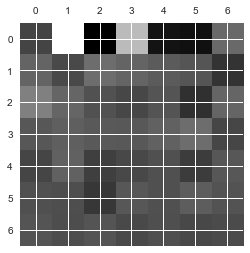

In [19]:
# Let's try Eigenfacing MNIST for fun!
first_projected_number = projected[0, :]
plt.gray() 
plt.matshow(np.reshape(first_projected_number, (7, 7))) 
plt.show()

#### Retreiving the original data back

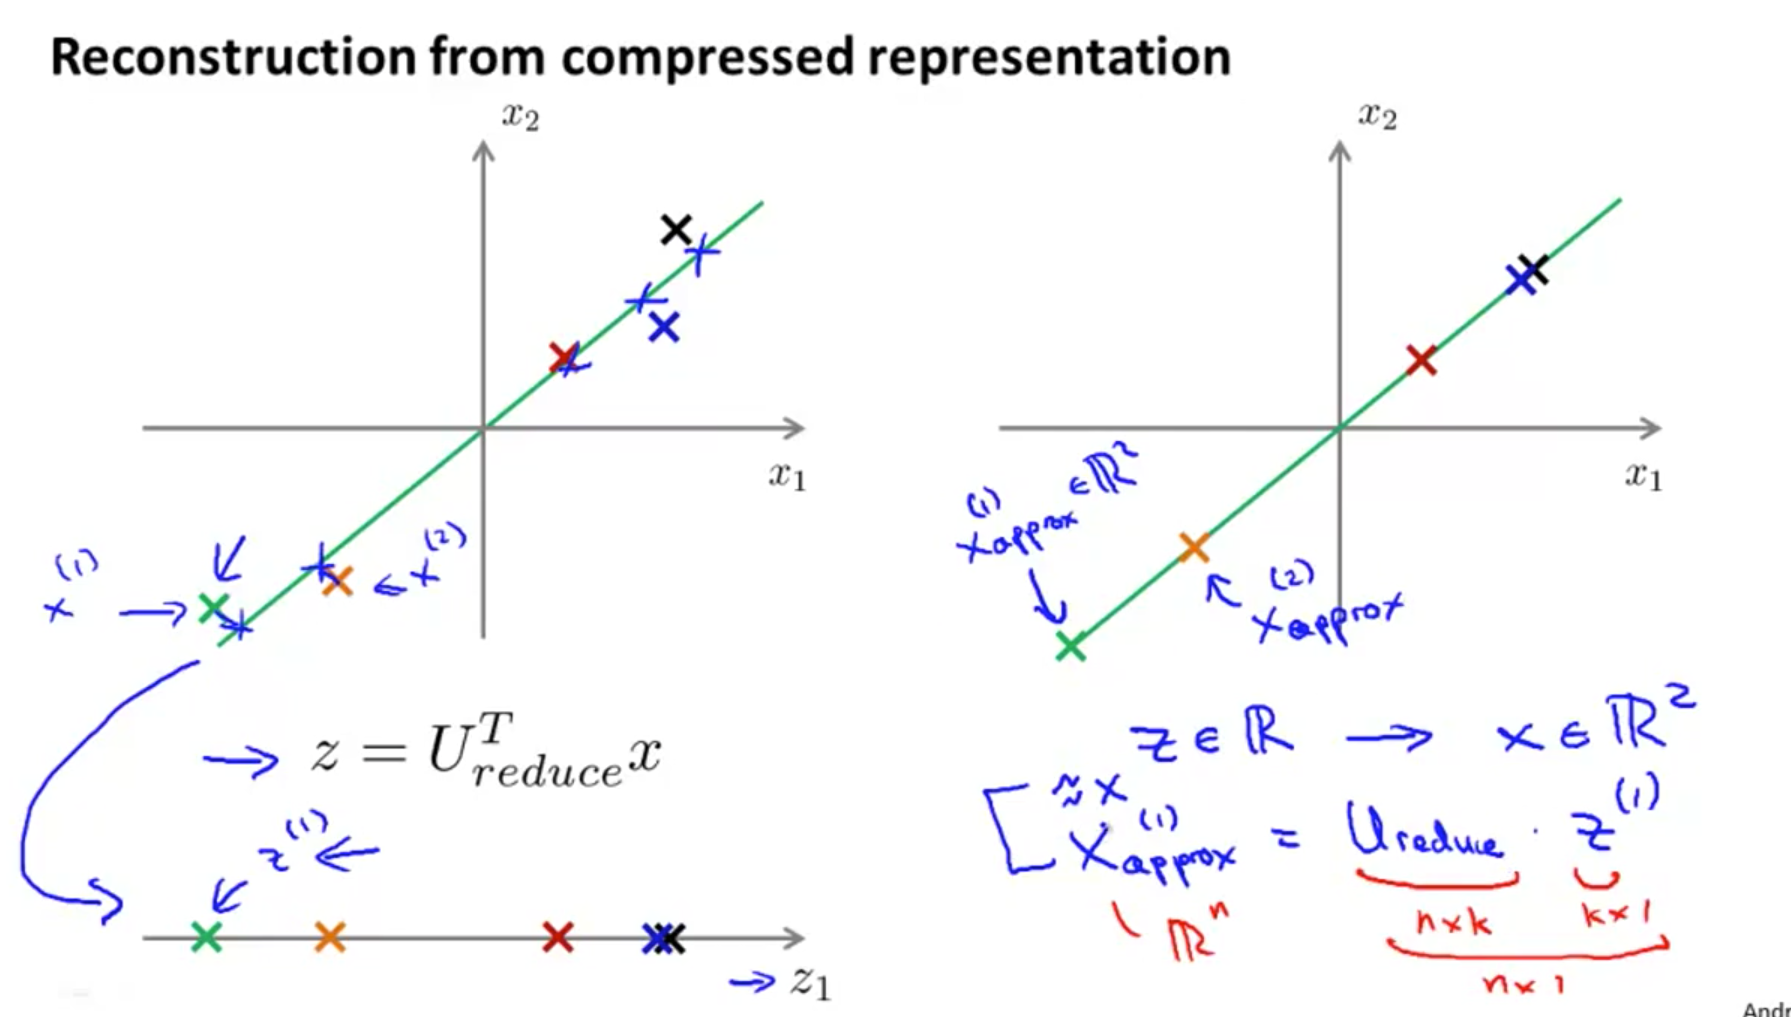

In [20]:
# Let's try to retreive back the original pixel information
inverse_transform = pca_components.inverse_transform(projected)
inverse_transform.shape

(1797, 64)

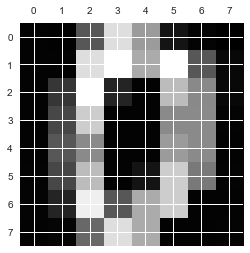

In [21]:
first_projected_number = inverse_transform[0, :]
plt.gray() 
plt.matshow(np.reshape(first_projected_number, (8, 8))) 
plt.show()

Let's try to see how the reconstruction turns out if we reduce the amount of variance we retain, so say we pick K = 20, which is approximately 90% of the original variance

In [22]:
cumulative_sum[19]

0.8943031165985262

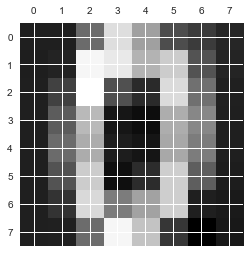

In [23]:
pca_components = PCA(19)
projected = pca_components.fit_transform(digits.data)
inverse_transform = pca_components.inverse_transform(projected)
inverse_transform.shape
first_projected_number = inverse_transform[0, :]
plt.gray() 
plt.matshow(np.reshape(first_projected_number, (8, 8))) 
plt.show()

That's actually not too bad for this particular use case. The amount of variance we retain is a subjective to our data. The thumb rule is 95% or 99% variance is a good call